___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 


# TERCER EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Diego Alberto López Lazareno

## Fecha: 28 de noviembre del 2021

## Por: Oscar David Jaramillo Z.

# 1
Vamos a suponer que el curso de simulación de procesos financieros es una gran empresa de consultoría financiera que ofrece sus servicios a cualquier tipo de compañía o particular. Supongamos que acuden a nuestra empresa 4 personalidades con los siguientes problemas que desean solucionar:
> 1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 
> 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.
> 3. El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.
> 4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

Para cada uno de los clientes, se debe de presentar 3 posibles estrategias de cobertura usando opciones Europeas, Asiáticas y barrera tipo call ó put. Además de ofrecer al cliente este abanico de posibilidades, ustedes como analistas financieros deben de recomendar la mejor estrategia costo-beneficio (basado en sus cálculos), que debería cada empresa tomar, para cumplir con su objetivo. Recuerden, pueden asumir diversos escenarios donde con la valuación realizada para cada una de sus opciones, puedan ustedes dar un estimado monetario en dos posibles escenarios. Por ejemplo, si pueden ejercer la opción entonces el cliente además de vender o comprar sus productos obtendrá una cantidad X de ganancias adicionales o en lugar de perder un 50% de los ingresos en sus ventas, el empresario puede perder sólo el 10% de los ingresos de sus ventas, por mencionar un posible escenario. Por el contrario, en el caso que no ejerza su opción el cliente tendrá una pérdida de la prima de la cantidad de opciones compradas (pero recalcando que el empresario puede estar cubierto ante diversas situaciones). La calificación será basada en el análisis que realicen y propongan a cada cliente usando los resultados de sus valuaciones.

**Para la valuación de opciones europeas debes de comparar tu valuación usando montecarlo con el valor teórico dado por el modelo de Black and Scholes dado en clase y concluir,**

> ###  Criterio de evaluación
> - Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.
> - **Ejercicio 1**: 40% La valuación de cada tipo de opción corresponderá al 40% de todo este examen.
> - **Ejercicio 2**: 60%. El restante 60% corresponderá a la decisión o recomendación basado en sus análisis que le recomendarán a cada compañía.

> ### Entrega
> Se debe de entregar un cuaderno de python donde se reporten todos los cálculos empleados en su análisis. La fecha límite de entrega será el martes 7 de diciembre a las 5 pm y se expondrá ese mismo día los resultados obtenidos.

> ### Suposiciones 
> - Deben de definirse correctamente el nombre de las acciones a descargar de Yahoo según la empresa asignada.
> - El examen es individual y códigos idénticos serán penalizados.


In [1]:
## ------------------------------------------- Librerías necesarias ------------------------------------------- ##
# Manejo de datos y análisis numérico
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline

# Yfinance
import yfinance as yf

# Manejo del tiempo
import time
import datetime 

# Facebook's prophet
from fbprophet import Prophet

# Filtrado de alertas 
import warnings
warnings.filterwarnings("ignore")

## ------------------------------------------- Funciones necesarias ------------------------------------------- ##
def commoditiesPricesYfinance(ticker : "Símbolo de cotización del commodity"):
    """
    commoditiesPricesYfinance retorna un DataFrame, historicalPrices, con el precio de cierre ajustado para la materia prima
    en cuestión. La descarga de datos se hace con ayuda de la paquetería de yfinance.
    
    *ticker : símbolo de cotización del commodity (para yfinance).
    
    """
    
    historicalPrices = yf.download(ticker, progress = False)
    
    return historicalPrices

def commoditiesPricesVisualization(data, title, ticker, color, hlines1, hlines2):

    start = datetime.datetime.today() - datetime.timedelta(365 * 3)
    data = data[data.index >= start]

    plt.figure(figsize = (15, 5))
    plt.title("Precios de Cierre Ajustado: " + title)
    plt.plot(data["Adj Close"], color = color[0], label = ticker)
    [plt.fill_between(data.index, line1, line2, color = color[1], alpha = 0.35) for line1, line2 in zip(hlines1, hlines2)];
    plt.xlabel("Fecha")
    plt.ylabel("USD")
    plt.legend(loc = "best")
    plt.grid()
    
    return data
    
def TimeSeriesPrediction(data, title, label, xlabel, ylabel, color, periods):
    
    train_dataset = pd.DataFrame()
    train_dataset["ds"] = pd.to_datetime(data.index, format = "%Y")
    train_dataset["y"] = data.values
    prophet_basic = Prophet()
    prophet_basic.fit(train_dataset)
    
    future = prophet_basic.make_future_dataframe(periods = periods)
    forecast = prophet_basic.predict(future)
    forecast = forecast.loc[len(train_dataset):, :][["yhat", "yhat_lower", "yhat_upper"]]
    newIndex = [int(data.index[-1]) + i for i in range(1, periods + 1)]
    forecast.index = newIndex
    
    plt.figure(figsize = (15, 5))
    plt.title(title)
    plt.plot(data, label = label, color = color[0])
    plt.plot(forecast["yhat"], "--", label = "Predicciones", color = color[0])
    plt.plot(forecast["yhat_lower"], "--", label = "Límite inferior", color = color[1])
    plt.plot(forecast["yhat_upper"], "--", label = "Límite superior", color = color[1])
    plt.legend(loc = "best")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    
    return forecast
    
    

## Cliente 1

> El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 

### Interpretación


### Supuestos


### Referencias consultadas

+ https://quickstats.nass.usda.gov/#73EB5B6B-6010-3651-8EFD-A15811AD0ADA
+ https://www.nass.usda.gov/Charts_and_Maps/Field_Crops/cornyld.php
+ https://www.google.com.mx/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwilpcqN-8X0AhWXlmoFHUI5CRgQFnoECC0QAQ&url=https%3A%2F%2Fwww.agry.purdue.edu%2Fext%2Fcorn%2Fnews%2Ftimeless%2Fyieldtrends.html&usg=AOvVaw1aO6fzKtXBTfJm_2sDZ69w

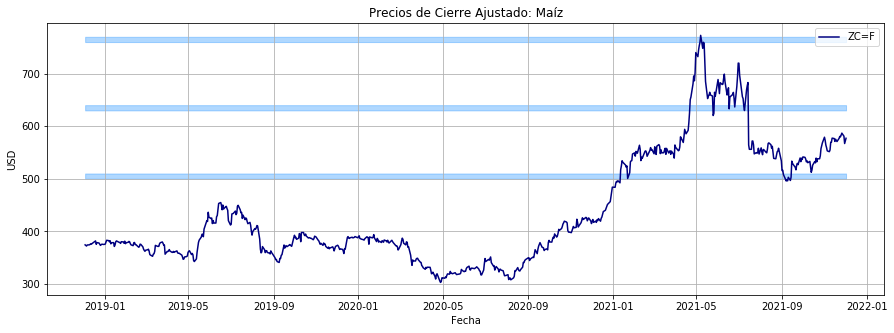

In [2]:
ticker1 = "ZC=F"
data1 = commoditiesPricesYfinance(ticker1)
data1 = commoditiesPricesVisualization(data1, "Maíz", ticker1, ["navy", "dodgerblue"], [500, 630, 760], [510, 640, 770])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Predicciones Corn Yield,Límite inferior,Límite superior
2022,182.454748,168.607073,195.764618
2023,186.515923,172.730070,200.258476
2024,189.464165,176.231936,203.549600
2025,191.222536,177.735820,205.481340
2026,191.738990,179.525052,205.405230


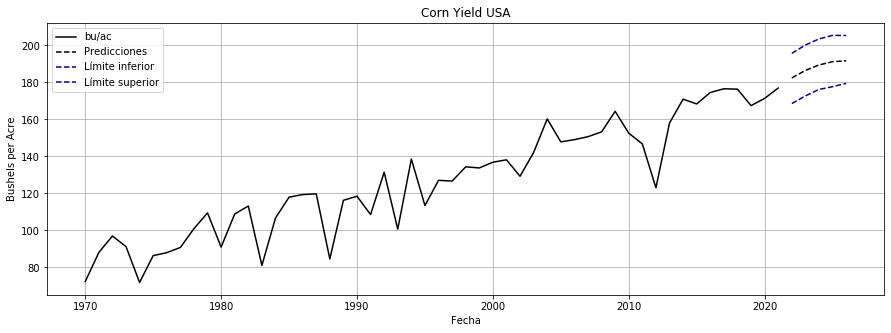

In [3]:
cornYield = pd.read_csv("Data/CornYieldUSA.csv")[["Year", "Value"]][::-1].set_index(["Year"])
predictions = TimeSeriesPrediction(cornYield[cornYield.index >= 1970], "Corn Yield USA", "bu/ac", "Fecha", 
                                   "Bushels per Acre", ["k", "darkblue"], 5)
predictions.columns = ["Predicciones Corn Yield", "Límite inferior", "Límite superior"]
predictions

In [6]:
182 * 100

18200

## Cliente 2 

> La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.

### Interpretación


### Supuestos



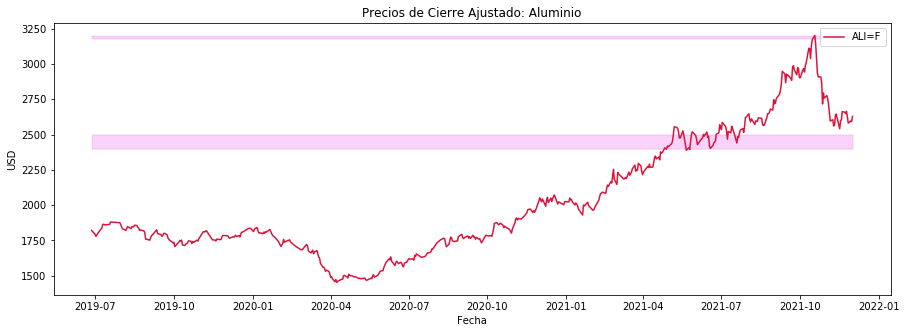

In [3]:
ticker2 = "ALI=F"
data2 = commoditiesPricesYfinance(ticker2)
commoditiesPricesVisualization(data2, "Aluminio", ticker2, ["crimson", "violet"], [2400, 3180], [2500, 3200])

## Cliente 3

> El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.

### Interpretación


### Supuestos



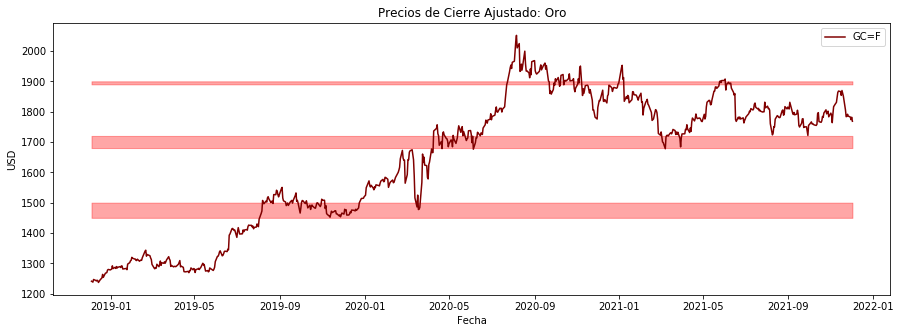

In [4]:
ticker3 = "GC=F"
data3 = commoditiesPricesYfinance(ticker3)
commoditiesPricesVisualization(data3, "Oro", ticker3, ["maroon", "red"], [1680, 1450, 1890], [1720, 1500, 1900])

## Cliente 4

> Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

### Interpretación


### Supuestos



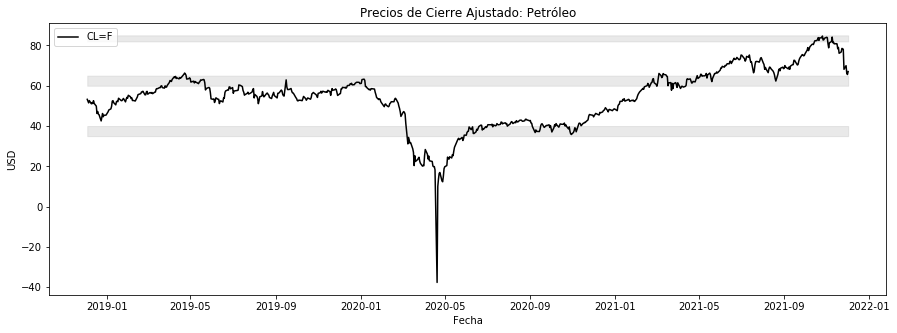

In [5]:
ticker4 = "CL=F"
data4 = commoditiesPricesYfinance(ticker4)
commoditiesPricesVisualization(data4, "Petróleo", ticker4, ["k", "silver"], [60, 35, 82], [65, 40, 85])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>